
<img src='empAttrition.jpg'></img>

## Employee Attrition & Performance
**Predict Employee Attrition**

Employee attrition is one of the key problems affecting the productivity of companies worldwide. It is often difficult for an HR department to identify which employees are most likely to leave the company and for what reasons. In this project, we try to analyse what factors lead to employee retention in companies, and what factors influence them the most. However with advances in machine learning and data science, its possible to not only predict employee attrition but to understand the key variables that influence employee attrition.


**Objective:** 
  - Constructing a model to predict whether a particular employee will leave the company. 
  - Identifying the key factors contributing to employee leaving the company. 
  - Generate key actionables to reduce employee attrition rate.
 


### Dataset
The dataset used in this analysis is provided from **IBM HR** to study about employee attrition. The dataset contain 35 variables along with Attrition variable. It can be downloaded from the <a href='https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data'>Kaggle</a>

| Features | Description  |
| ---      | ---          |
| Education               | (1) Below College' (2) College (3) Bachelor (4) Master (5) Doctor |
| EnvironmentSatisfaction | (1) Low (2) Medium (3) High (4) Very High                         |
| JobInvolvement          | (1) Low (2) Medium (3) High (4) Very High                         |
| JobSatisfaction         | (1) Low (2) Medium (3) High (4) Very High                         |
| RelationshipSatisfaction| (1) Low (2) Medium (3) High (4) Very High                         |  
| PerformanceRating       | (1) Low (2) Good (3) Excellent (4) Outstanding                    |
| WorkLifeBalance         | (1) Bad (2) Good (3) Better (4) Best                              |



### I. Data Problem
Employee attrition is the rate at which employees leave a company. The goal of this analysis is to model employee attrition and determine the most dominant contributing factors that govern this turnover. Through this kind of analysis, we can understand how many employees are likely to leave, while also determining which employees are at the highest risk and for what reasons.

To solve this problem, I decided to use a combination of **three type of analytics**:

- **Descriptive Analytics:** What are the observations that help us shape our various hypotheses about staff attrition?
- **Predictive Analytics:** Which members of staff are about to leave?
- **Prescriptive Analytics:** What insights or suggestions can be made concerning those members of staff who are likely to leave?



### II. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from biokit.viz import corrplot

#%config InlineBackend.figure_formats = {'svg', 'retina'}
%matplotlib inline

from matplotlib import rcParams
rcParams['axes.titlepad'] = 15 
rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

#### Loading the data
We load the data and look at the different Variables in the dataset

In [2]:
data = pd.read_csv('Employee_Attrition.csv')

There are 1470 observations with 35 features.

In [3]:
data.shape

(1470, 35)

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Missing Values
It seems that there are no NA values in the dataset.

In [5]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### III. Exploratory Data Analysis (EDA)
In this section, we explore the dataset by taking a look at the feature distributions, how correlated one feature is to the other.

- From this overview we find that columns like **Over18**, **EmployeeCount**, **EmployeeNumber** and **StandardHours** are not informative and remove it.

In [6]:
data.drop(['Over18', 'EmployeeCount', 'EmployeeNumber' , 'StandardHours'], axis=1 ,inplace=True)

From the correlation plots below, we can see that quite a lot of features seem to be poorly correlated with one another. Generally when making a predictive model, it would be preferable to train a model with features that are not too correlated with one another so that we do not need to deal with **redundant features** or **multicollinearity**. 

In [7]:
numerical_features = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                      'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 
                      'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

categorical_features = ['Attrition','Education','EnvironmentSatisfaction','Gender','JobInvolvement', 'JobLevel',
                        'JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction',
                        'StockOptionLevel','WorkLifeBalance','BusinessTravel','EducationField','Department','JobRole']

### Numerical Features

In [8]:
numeric_data = pd.DataFrame(data[numerical_features])

**Correlation Matrix** uses to predict correlation between numeric varibales.

Now we will explore the relationship between variables using a correlation matrix.

In [9]:
df = numeric_data.corr()
corr = corrplot.Corrplot(df)

- The correlation matrix displays the linear correlation between every pair of features in the form of pie of varying colors and slices to illustrate numerical proportion. 
- From the correlation plot below, we see that the predictor variables are less correlated to each other.

  - **Highly correlated features:**
    - Age variable is correlated with TotalWorkingYears
    - TotalWorkingYears correlated with MonthlyIncome
    - YearsWithCurrManager also correlated with YearsAtCompany
    - YearsWithCurrManger correlated with YearsInCurrentRole
    - YearsInCurrentRole correlated with YearsAtCompany

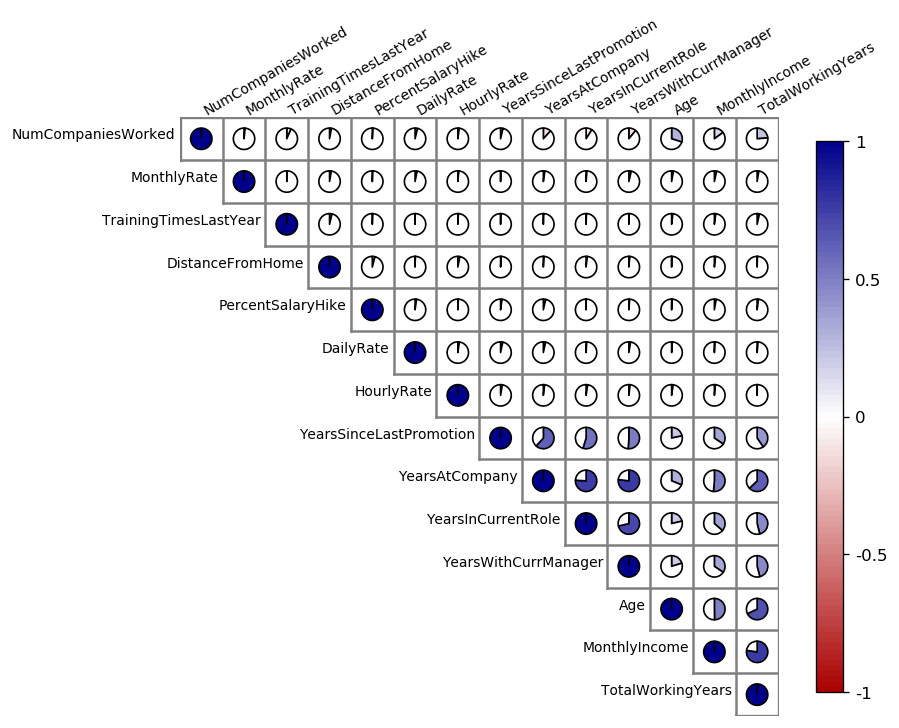

In [10]:
fig = plt.figure(figsize=(8,7))
corr.plot(shrink=0.5, upper='pie',fig=fig)

### Data Distribution of Features
One of the first few steps in exploring the data would be to have a an idea of how the features are distributed with one another.

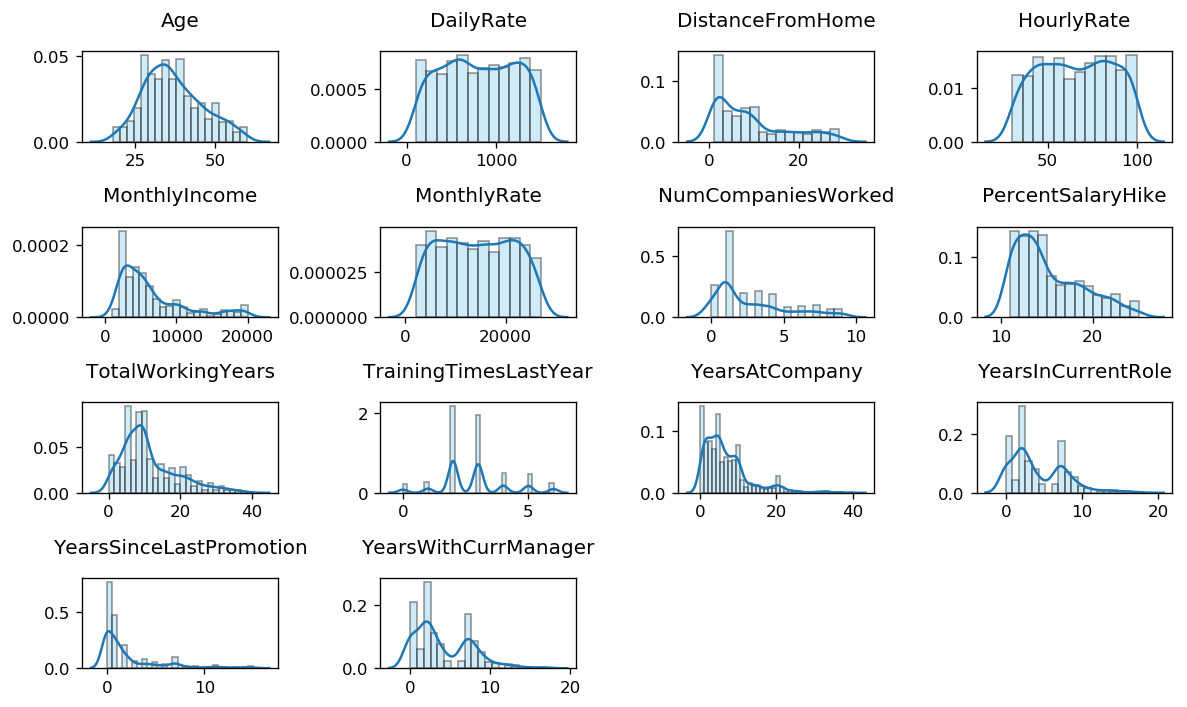

In [11]:
fig = plt.figure(figsize=(10,6))
for i, features in enumerate(numerical_features):
    ax = fig.add_subplot(4,4, i+1)
    sns.distplot(data[features],hist_kws=dict(edgecolor="k", linewidth=1,color='skyblue'))
    plt.title(features)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [12]:
from scipy import stats
from scipy.stats import norm, skew

In [13]:
skewed_features = data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewness' :skewed_features})
skewness

,Skewness
YearsSinceLastPromotion,1.982265
YearsAtCompany,1.762728
MonthlyIncome,1.368419
TotalWorkingYears,1.116032
NumCompaniesWorked,1.025423
DistanceFromHome,0.957140
YearsInCurrentRole,0.916427
YearsWithCurrManager,0.832600
PercentSalaryHike,0.820290
TrainingTimesLastYear,0.552560


In [14]:
# Text Annotation
def text_annotate(cnt):
    for i in cnt.patches:
        height = i.get_height()
        cnt.text(i.get_x() + i.get_width()/2., height,'%d' % int(height),ha='center',va='bottom',
                 fontsize=8,color='darkblue', bbox=dict(boxstyle="round,pad=0.3",facecolor='white',alpha=0.3))

### Categorical Features

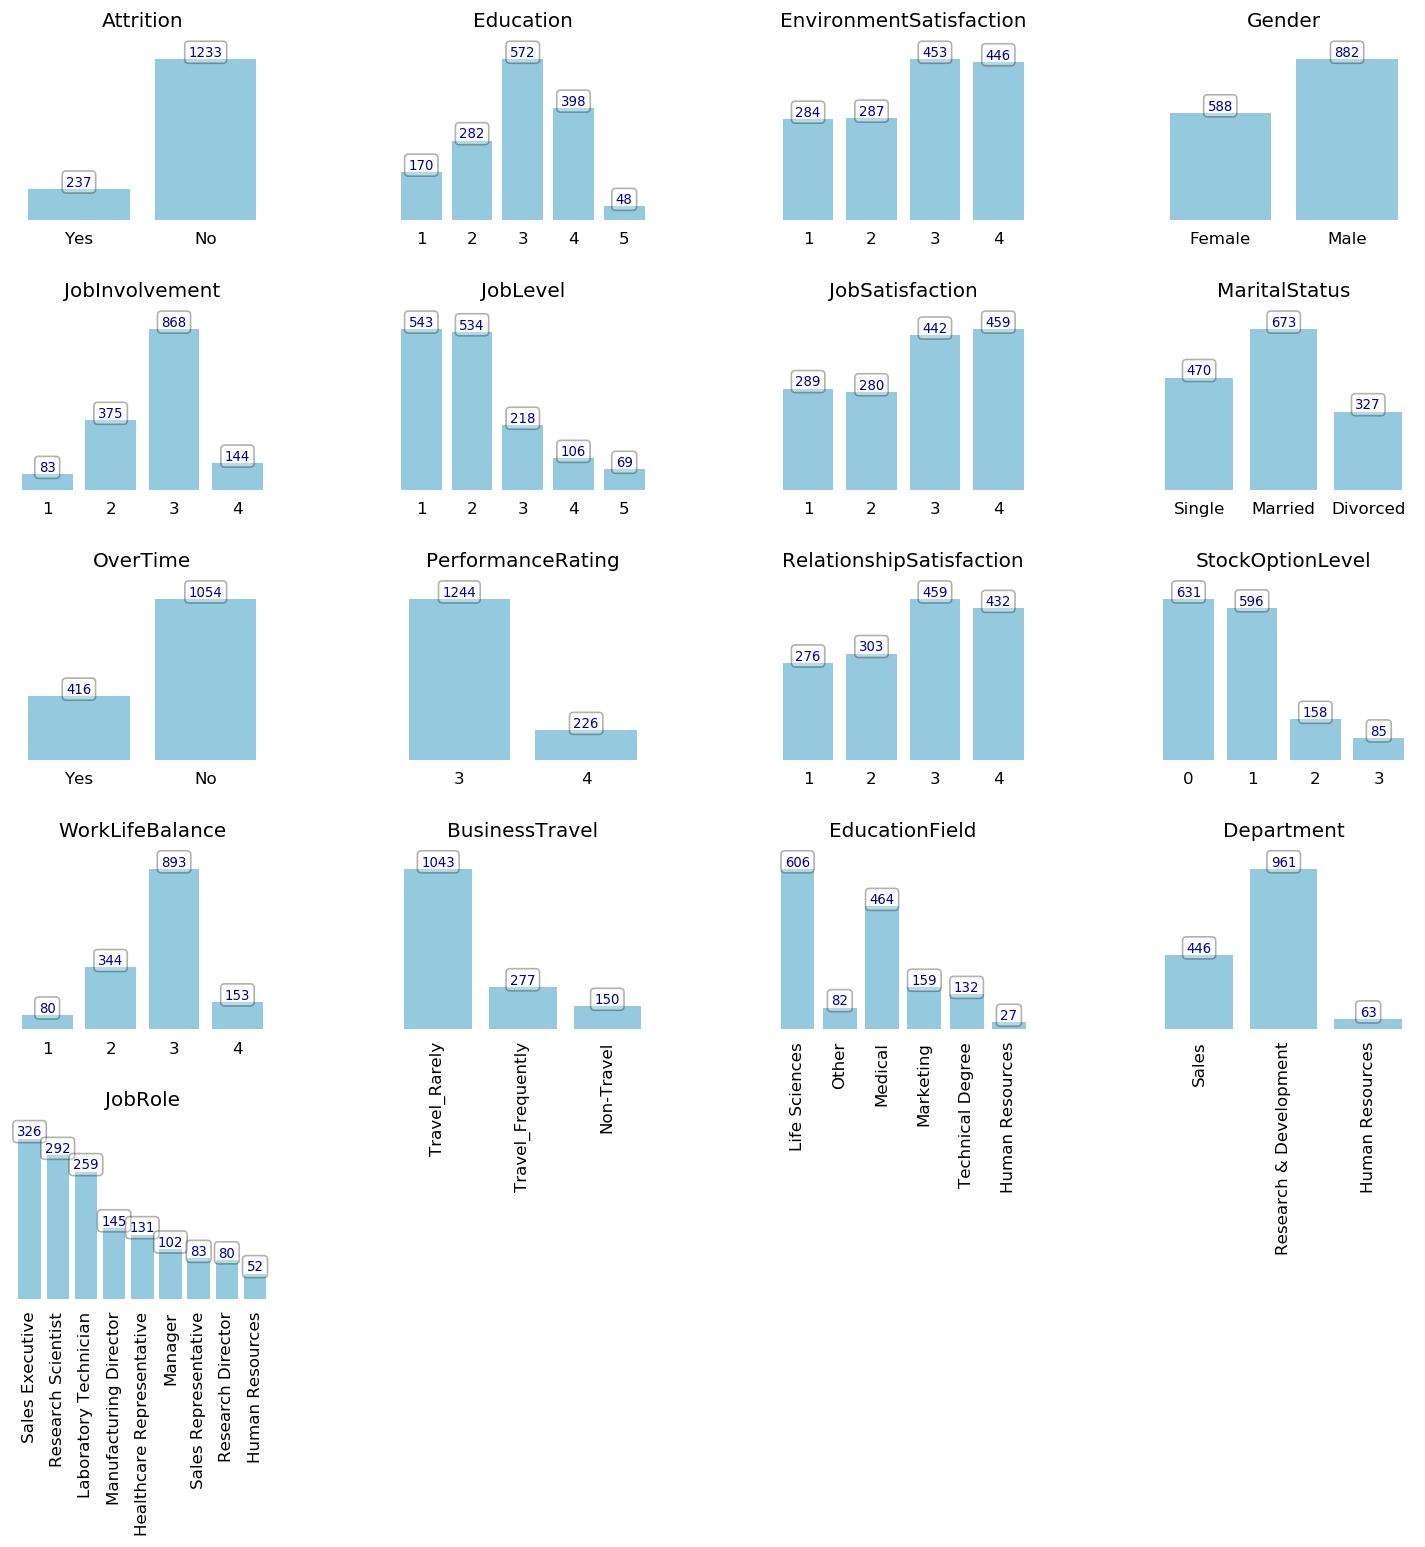

In [15]:
fig = plt.figure(figsize=(15,8))
for i, features in enumerate(categorical_features):
    ax = fig.add_subplot(5,4, i+1)
    # Remove all the ticks and directly label each bar with respective value
    ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
    ax.set_frame_on(False)
    # Values annotation
    cnt= sns.countplot(data[features],color='skyblue')
    text_annotate(cnt)
    plt.title(features)
    plt.ylabel('')
    plt.xlabel('')
    if(i>12):
        plt.xticks(rotation=90)
plt.subplots_adjust(bottom=-0.4, top=0.9, wspace=0.5, hspace=0.6)
plt.show()

In [16]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.core.properties import value
from bokeh.transform import dodge
from bokeh.models import ColumnDataSource, CustomJS
from bokeh.models.widgets import Select,  Panel, Tabs, TextInput
from bokeh.layouts import row, column, widgetbox

output_notebook(hide_banner=True)

In [84]:
numeric = data[['Attrition','Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate', 
                'NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 
                'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]

In [113]:
from bokeh.transform import jitter

numeric['x']=np.nan
source = ColumnDataSource(numeric)

p = figure(plot_width=650, plot_height=300, y_range=['No','Yes'])
p.circle(x=jitter('x',width=1), y=jitter('Attrition',width=0.5,range=p.y_range), source=source, alpha=0.35)

callback = CustomJS(args={'source':source},code="""
        
        // create a new variable for the data of the column data source that is linked to the plot
        var data = source.data;

        // allocate the selected column to the field for the y values
        data['x'] = data[cb_obj.value];

        source.change.emit();
""")

features= ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate', 
           'NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']


select = Select(title="Features:", options=features)

# Add the callback to the select widget. This executes each time the selected option changes
#select.callback = callback
select.js_on_change('value', callback)

show(row(p,select))